<a href="https://colab.research.google.com/github/wmangoni/wmangoni.github.io/blob/main/portfolio_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go

# Carregar o CSV
df = pd.read_excel('executionrecords.xlsx')

print(df.columns)

Index(['accumulation.day', 'accumulation.month', 'accumulation.monthWeek',
       'accumulation.reserve', 'accumulation.total', 'accumulation.year',
       'bureau.adresses.0', 'bureau.birthDate', 'bureau.bureauSearchedAt',
       'bureau.cascadeProvidersOrder.0',
       ...
       'executionRuleSet.1.workflowPreset.limits.year',
       'executionRuleSet.1.workflowPreset.name',
       'executionRuleSet.1.workflowPreset.rules.PEPMonitoring.enabled',
       'executionRuleSet.1.workflowPreset.rules.restrictiveListsMonitoring.enabled',
       'executionRuleSet.1.workflowPreset.updatedAt',
       'executionRuleSet.1.workflowPreset.version',
       'executionRuleSet.1.workflowRunStatus',
       'bureauDetailed.restrictiveListSource',
       'bureauDetailed.restrictiveListType',
       'executionRuleSet.1.rules.1.disclaimer'],
      dtype='object', length=115)


# Converter colunas de datas para o formato datetime, se necessário

In [3]:
df['createdAt'] = pd.to_datetime(df['transaction.referenceDate'])
df['transaction.referenceDate'] = pd.to_datetime(df['transaction.referenceDate'])

OUTPUT_DIR = "data/output"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def plot_percentage_bar(df, column_name, title, xtick_labels=None, rotation=0):

    ax = df[column_name].value_counts().plot(kind='bar', title=title)

    if xtick_labels != None:
      ax.set_xticklabels(['Maior', 'Menor'], rotation=0)

    total = len(df[column_name])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + 0.05
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()

# Análise 1: Regressão Linear
## Exemplo: Tempo de execução vs Valor da transação

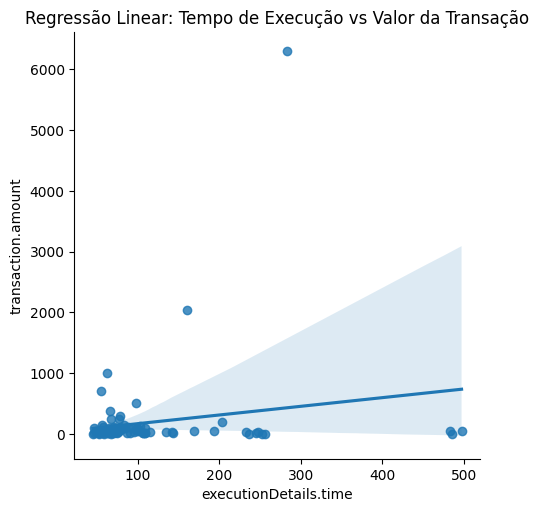

In [4]:
sns.lmplot(x='executionDetails.time', y='transaction.amount', data=df)
plt.title('Regressão Linear: Tempo de Execução vs Valor da Transação')
plt.show()

# Análise 2: Séries Temporais
## Exemplo: Variação do total acumulado ao longo do tempo

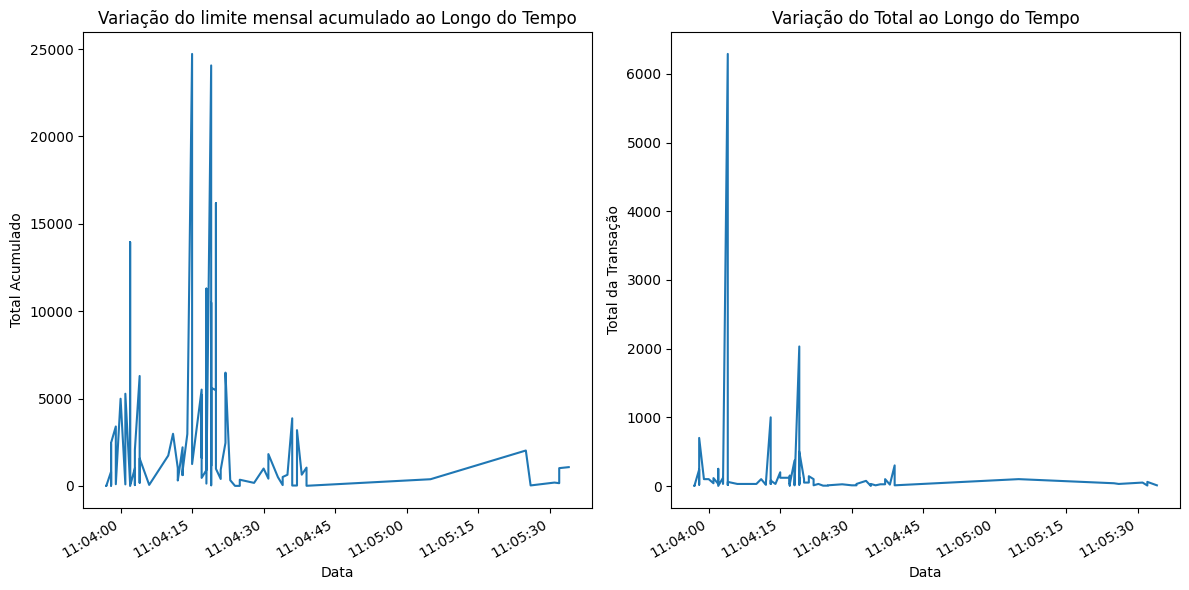

In [5]:
# Configuração da figura
plt.figure(figsize=(12, 6))

# Configuração do primeiro gráfico
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
df.set_index('transaction.referenceDate', inplace=True)
df['accumulation.month'].plot(title='Variação do limite mensal acumulado ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total Acumulado')

# Configuração do segundo gráfico
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
#df.set_index('transaction.referenceDate', inplace=True)
df['transaction.amount'].plot(title='Variação do Total ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total da Transação')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

# Análise 3: Análise de Regras dos workflows
## Contagem de sucesso/falha das regras

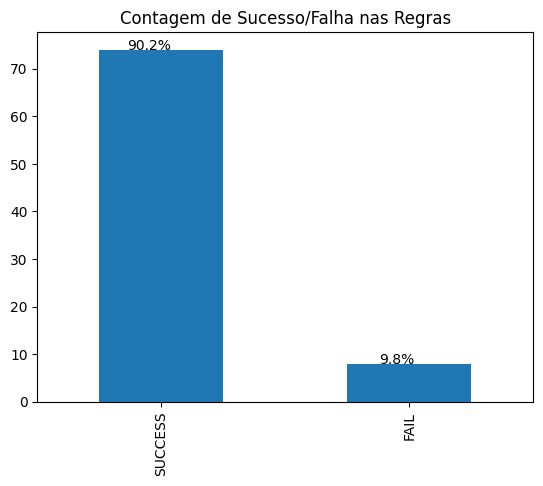

In [6]:
plot_percentage_bar(df, 'validationStatus', 'Contagem de Sucesso/Falha nas Regras')

## Contagem de transações por provedor

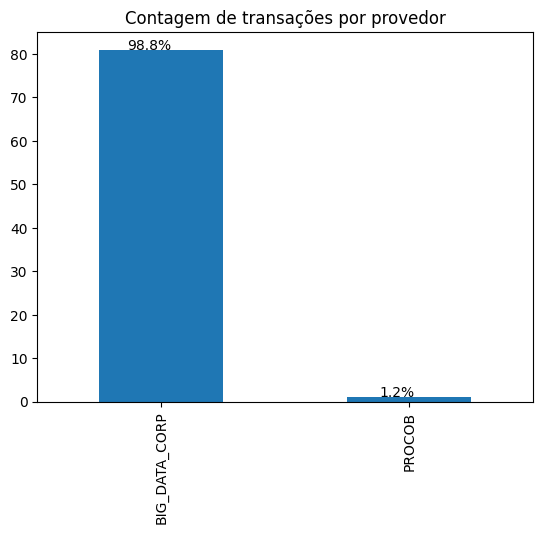

In [7]:
plot_percentage_bar(df, 'bureau.provider', 'Contagem de transações por provedor')

## Contagem de maior/menor de idade

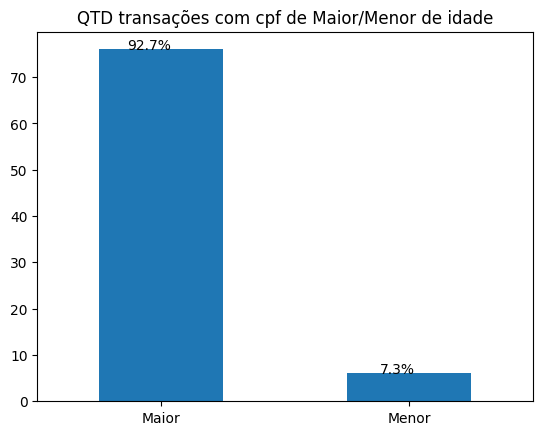

In [8]:
plot_percentage_bar(df, 'bureau.isMinor', 'QTD transações com cpf de Maior/Menor de idade', ['Maior', 'Menor'])

## Contagem de transações por sexo

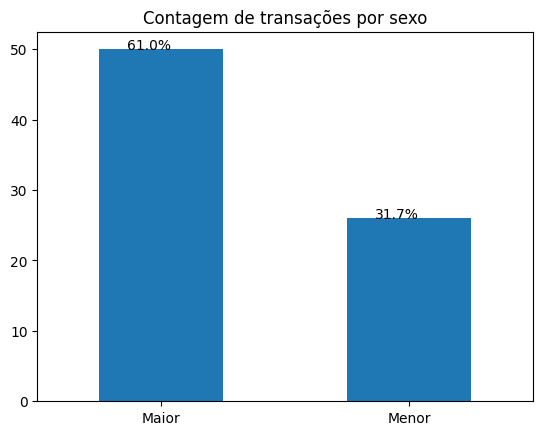

In [9]:
plot_percentage_bar(df, 'bureau.gender', 'Contagem de transações por sexo', ['Masculino', 'Feminino'])

## Contagem de Transações por Tipo de Operação

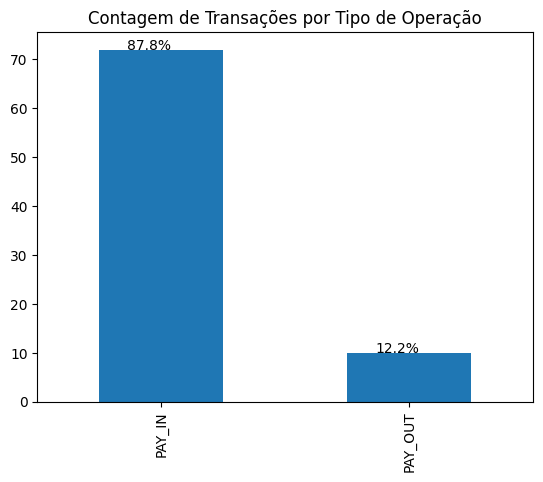

In [10]:
plot_percentage_bar(df, 'transaction.operationType', 'Contagem de Transações por Tipo de Operação')

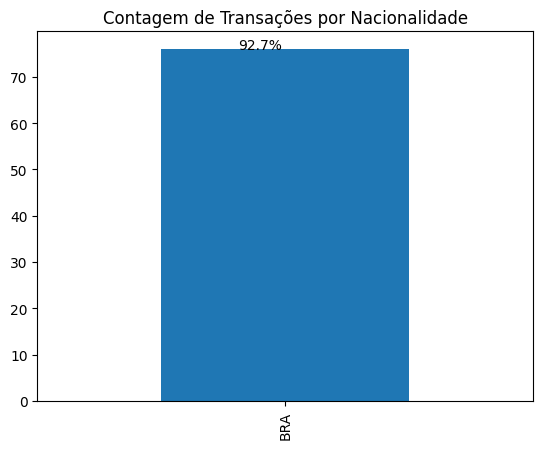

In [11]:
mapeamento_nationality = {'BRASILEIRA': 'BRA', 'Brasileiro': 'BRA'}
df['bureau.nationality'] = df['bureau.nationality'].replace(mapeamento_nationality, regex=True, inplace=False)
plot_percentage_bar(df, 'bureau.nationality', 'Contagem de Transações por Nacionalidade')

# Análise 4: Correlação entre Variáveis Numéricas

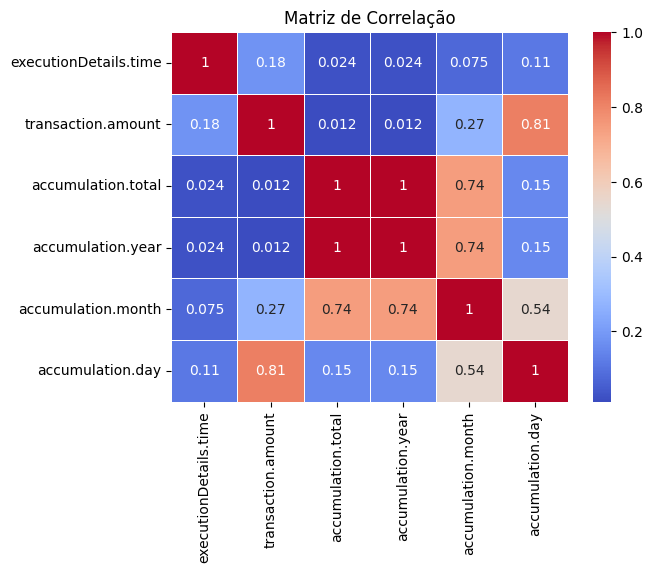

In [12]:
df_filtered = df[['executionDetails.time', 'transaction.amount', 'accumulation.total', 'accumulation.year', 'accumulation.month', 'accumulation.day']].copy()
corr_matrix = df_filtered.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

# Análise 5: Tabela Resumida

In [13]:
summary_table = pd.DataFrame({
    'Quantidade de Operações': df.shape[0],
    'Média do Tempo de Execução': df['executionDetails.time'].mean(),
    'Moda do Tempo de Execução': df['executionDetails.time'].mode(),
    'Mediana do Tempo de Execução': df['executionDetails.time'].median(),
    'Media Valor da Transação': df['transaction.amount'].mean(),
    'Mediana Valor da Transação': df['transaction.amount'].median(),
    'Máximo Valor da Transação': df['transaction.amount'].max(),
    'Mínimo Valor da Transação': df['transaction.amount'].min(),
})
print(summary_table)

   Quantidade de Operações  Média do Tempo de Execução  \
0                       82                   111.95122   

   Moda do Tempo de Execução  Mediana do Tempo de Execução  \
0                         53                          77.0   

   Media Valor da Transação  Mediana Valor da Transação  \
0                184.947317                        35.0   

   Máximo Valor da Transação  Mínimo Valor da Transação  
0                     6292.0                        1.0  


In [14]:
df_filtered = df[['executionDetails.time', 'transaction.amount', 'accumulation.total', 'accumulation.year', 'accumulation.month', 'accumulation.day']].copy()
df_filtered.describe()

,executionDetails.time,transaction.amount,accumulation.total,accumulation.year,accumulation.month,accumulation.day
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,111.951220,184.947317,11750.954024,11750.954024,2530.439268,385.355854
std,92.920503,731.184794,20213.613857,20213.613857,4641.358651,1071.906474
min,45.000000,1.000000,1.500000,1.500000,1.500000,1.000000
25%,63.000000,19.452500,292.500000,292.500000,141.000000,25.000000
50%,77.000000,35.000000,3118.400000,3118.400000,869.500000,50.000000
75%,108.500000,100.000000,13509.857500,13509.857500,2466.750000,319.202500
max,497.000000,6292.000000,127414.000000,127414.000000,24720.000000,6732.000000


from matplotlib import pyplot as plt
_df_0['executionDetails.time'].plot(kind='hist', bins=20, title='executionDetails.time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['transaction.amount'].plot(kind='hist', bins=20, title='transaction.amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['accumulation.total'].plot(kind='hist', bins=20, title='accumulation.total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['accumulation.year'].plot(kind='hist', bins=20, title='accumulation.year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='executionDetails.time', y='transaction.amount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='transaction.amount', y='accumulation.total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='accumulation.total', y='accumulation.year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='accumulation.year', y='accumulation.month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['executionDetails.time']
  ys = series['transaction.amount']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('executionDetails.time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('executionDetails.time')
_ = plt.ylabel('transaction.amount')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['executionDetails.time']
  ys = series['accumulation.total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('executionDetails.time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('executionDetails.time')
_ = plt.ylabel('accumulation.total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['executionDetails.time']
  ys = series['accumulation.year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('executionDetails.time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('executionDetails.time')
_ = plt.ylabel('accumulation.year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['executionDetails.time']
  ys = series['accumulation.month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('executionDetails.time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('executionDetails.time')
_ = plt.ylabel('accumulation.month')

from matplotlib import pyplot as plt
_df_12['executionDetails.time'].plot(kind='line', figsize=(8, 4), title='executionDetails.time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['transaction.amount'].plot(kind='line', figsize=(8, 4), title='transaction.amount')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['accumulation.total'].plot(kind='line', figsize=(8, 4), title='accumulation.total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['accumulation.year'].plot(kind='line', figsize=(8, 4), title='accumulation.year')
plt.gca().spines[['top', 'right']].set_visible(False)